<a href="https://colab.research.google.com/github/Mohammed-Rihan-Khan/Paytm-Payment-Bank-Customer-Segmentation-RMF-Analysis/blob/main/Paytm_Payment_Bank_Customer_Segmentation_RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to the Dataset**
The dataset, titled "bank_transactions.csv," comprises transactional data from a banking institution. Each record in the dataset represents a unique transaction made by a customer. The dataset includes several variables that capture the details of these transactions and customer information, which can be instrumental in performing customer segmentation based on RFM (Recency, Frequency, Monetary) analysis.


## **Variables in the Dataset**
**1. TransactionID**: A unique identifier assigned to each transaction.

**2. CustomerID:** A unique identifier assigned to each customer.

**3. CustomerDOB:** The date of birth of the customer.

**4. CustGender:** The gender of the customer.

**5. CustLocation:** The location of the customer.

**6. CustAccountBalance:** The account balance of the customer at the time of the transaction.

**7. TransactionDate:** The date on which the transaction took place.

**8. TransactionTime:** The time at which the transaction took place.

**9. TransactionAmount (INR):** The amount of money involved in the transaction, denoted in Indian Rupees (INR).


The primary goal of analyzing this dataset is to segment customers based on their purchasing behavior using the RFM model. This segmentation helps in identifying different customer groups, allowing the business to tailor marketing strategies effectively and improve customer relationship management.

## **Brief Introduction to RFM Customer Segmentation**
RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that categorizes customers based on their transaction history. The RFM model evaluates customers based on three dimensions:

**1. Recency (R):** How recently a customer has made a purchase. Customers who purchased recently are more likely to purchase again.

**2. Frequency (F):** How often a customer makes a purchase. Frequent purchasers are usually more loyal and more valuable.

**3. Monetary (M):** How much money a customer spends. High-spending customers are more valuable to the business.

By scoring each customer on these three dimensions, businesses can identify their most valuable customers, understand customer behavior, and tailor their marketing efforts accordingly.

## **Problem Statement for RFM Analysis and Customer Segmentation**
The aim of this project is to perform RFM analysis on the provided transactional data to segment customers into distinct groups based on their purchasing behavior. The specific objectives are:

###**Calculate RFM Values:**

    Recency: Determine the number of days since the last transaction for each customer.

    Frequency: Count the total number of transactions made by each customer.

    Monetary: Sum the total amount spent by each customer.

###**Score Assignment:**

    Assign scores to each customer's Recency, Frequency, and Monetary values based on predefined quantiles.

###**Customer Segmentation:**

    Combine RFM scores to create comprehensive customer segments.
    Analyze and interpret these segments to provide actionable insights for targeted marketing strategies.

The ultimate goal is to use the insights from RFM segmentation to improve customer retention, enhance customer satisfaction, and drive sales growth by focusing marketing efforts on the most valuable customer segments.


This project will utilize the transactional data to perform RFM customer segmentation. The analysis will involve calculating the recency, frequency, and monetary values for each customer, assigning scores based on these values, and then segmenting customers into distinct groups. The insights derived from this segmentation will enable the business to implement targeted marketing strategies, thereby enhancing customer engagement and driving business growth.

## **Importing The Libraries and modules**

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from datetime import datetime,date, timedelta
from yellowbrick.cluster import KElbowVisualizer

from mpl_toolkits.mplot3d import Axes3D


import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/bank_transactions.csv')

# Display the first few rows of the DataFrame to get an overview of the data
df.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


Let's check the shape of the Dataset

In [5]:
df.shape

(1048567, 9)

It has more then 1 million data entries and 9 features.

So let's check what are the columns are in the dataset.

In [6]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


Let's check how many null values present in the dataset.

In [8]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


As we can see thst there are some columns which has null values but it is very less as compared to the size of my dataset, so we'll drop these values

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [11]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1041614.0,114998.605283,846760.940316,0.0,4728.14,16768.52,57428.85,1.150355e+08
TransactionTime,1041614.0,157122.116378,51263.516076,0.0,124041.00,164247.00,200022.00,2.359590e+05
TransactionAmount (INR),1041614.0,1566.096079,6561.464373,0.0,160.00,457.50,1200.00,1.560035e+06


So, now we'll check for any duplicate values present in the dataset.

In [12]:
df.duplicated().sum()

0

There are no any duplicate value present in the dataset.

Ok, so now we'll check data present in the columns and will remove any indiscripancies present in the dataset.

In [13]:
df.CustomerDOB.value_counts()

,count
CustomerDOB,
1/1/1800,56292
1/1/89,809
1/1/90,784
6/8/91,698
1/1/91,665
...,...
2/12/51,1
20/3/52,1
26/9/47,1


In DOB column there are many customers are there whose YOB is 1800 and many with YOB greater then 2024.

In [14]:
# Load the dataset into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/bank_transactions.csv')

# Remove rows where 'CustomerDOB' is '1/1/1800', which is likely a placeholder for missing or invalid dates
df = df[~(df['CustomerDOB'] == '1/1/1800')]

# Display the count of unique values in the 'CustomerDOB' column to verify the changes
df['CustomerDOB'].value_counts()

,count
CustomerDOB,
1/1/89,809
1/1/90,784
6/8/91,699
1/1/91,666
1/1/92,633
...,...
3/9/60,1
17/11/52,1
11/9/63,1


### Let's convert the Datatypes of the columns to work with it.

In [15]:
# Convert 'CustomerDOB' column to datetime format
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"], format='%d/%m/%y')

# Display the first few rows of the DataFrame to verify changes
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


Here i am taking the thresold of 2016 for year of birth because in india an account can be opened even for a newborn jointly with the parant upto 10 years and after 10 years till 18 years he can open account independantly but with some restrictions.

In [16]:
print(max(df['TransactionDate']))

9/9/16


In [17]:
# Adjusting the 'CustomerDOB' for records where the year is 2016 or later
mask = df['CustomerDOB'].dt.year >= 2015  # Creating a mask for rows where year is 2016 or later
df.loc[mask, 'CustomerDOB'] -= pd.DateOffset(years=100)  # Subtracting 100 years from 'CustomerDOB' for these rows

# Displaying the first few rows of the dataframe to verify changes
df.head(100)


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
99,T100,C1713934,1977-09-18,F,KOLKATA,22588.09,6/8/16,182603,810.0
100,T101,C2742048,1986-04-29,F,NEW DELHI,37588.84,6/8/16,182613,1473.5
101,T102,C4953770,1986-10-27,M,VADODARA,96.20,6/8/16,182741,1897.0
102,T103,C6427021,1981-04-01,M,DELHI,31121.47,6/8/16,182927,974.0


In [18]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], format='%d/%m/%y')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


Checking if there are any customers whose account balance is in negative.

In [19]:
zero_bal = df[df['CustAccountBalance'] < 0]
print(zero_bal['CustomerID'].value_counts())

Series([], Name: count, dtype: int64)


Let's remove all the entries with transaction amount less then 1 rupee.

In [20]:
df = df[~(df['TransactionAmount (INR)'] < 1)]
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


Setting the Latest Date to calculate recency.

In [21]:
latest_date = df["TransactionDate"].max()

Creating new feature for EDA.

In [22]:
# Extracting year, month, and day from 'TransactionDate' into separate columns
df["Year"] = df["TransactionDate"].dt.year  # Extracting year
df['Month'] = df["TransactionDate"].dt.month  # Extracting month
df['Day'] = df["TransactionDate"].dt.day  # Extracting day

# Displaying the first few rows of the dataframe to verify changes
df.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Year,Month,Day
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,2016,8,2
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,2016,8,2
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,2016,8,2
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,2016,8,2
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,2016,8,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990236 entries, 0 to 1048566
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            990236 non-null  object        
 1   CustomerID               990236 non-null  object        
 2   CustomerDOB              986849 non-null  datetime64[ns]
 3   CustGender               990009 non-null  object        
 4   CustLocation             990085 non-null  object        
 5   CustAccountBalance       988050 non-null  float64       
 6   TransactionDate          990236 non-null  datetime64[ns]
 7   TransactionTime          990236 non-null  int64         
 8   TransactionAmount (INR)  990236 non-null  float64       
 9   Year                     990236 non-null  int32         
 10  Month                    990236 non-null  int32         
 11  Day                      990236 non-null  int32         
dtypes: datetime64[ns](2)

Cheking distribution os each column present in the dataset.

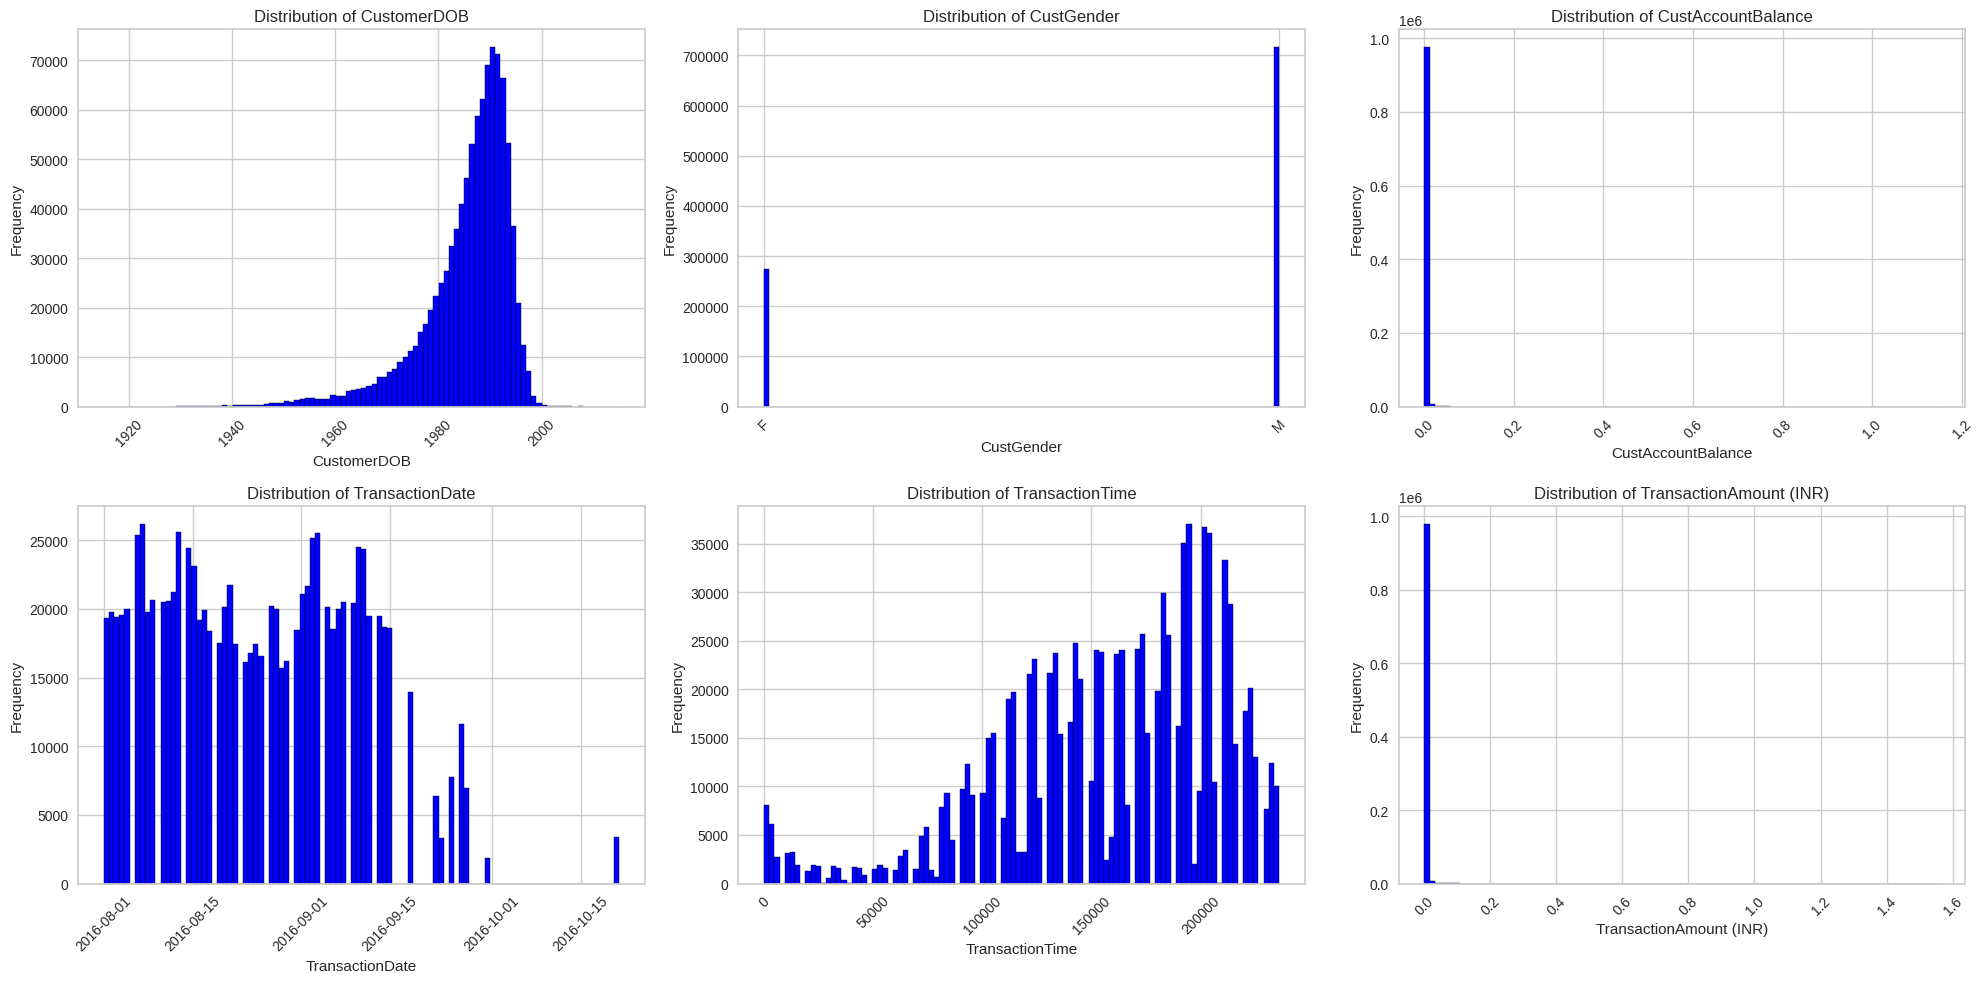

In [24]:
# Define the columns to plot
columns = ['CustomerDOB', 'CustGender', 'CustAccountBalance', 'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Iterate through each subplot and corresponding column
for ax, col in zip(axes.flatten(), columns):
    # Plot histogram for the current column, dropping NaN values
    ax.hist(df[col].dropna(), bins=100, color='blue', edgecolor='black')

    # Set title and labels for the current subplot
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()



The transaction and customer account balance are havily positively skewed. so let's create a box plot to check the distribution.

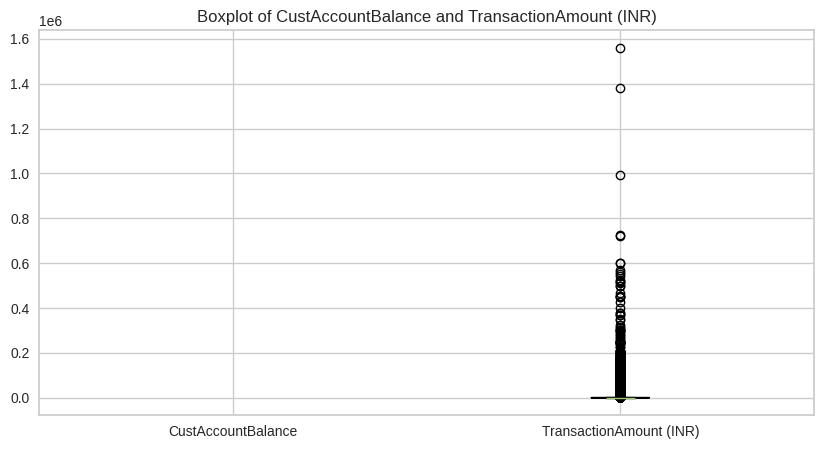

<Figure size 800x550 with 0 Axes>

In [25]:
columns = ['CustAccountBalance','TransactionAmount (INR)']

plt.figure(figsize = (10,5))
plt.boxplot(df[columns], patch_artist=True, notch=True)
plt.title('Boxplot of CustAccountBalance and TransactionAmount (INR)')
plt.xticks(range(1, len(columns) + 1), columns)
plt.show()


plt.tight_layout()
plt.show()


**Account Balance Distribution**:

The dataset shows that a subset of customers maintains very high account balances. This is not unexpected as it likely includes wealthy individuals or high-net-worth business clients who naturally maintain substantial balances in their accounts. Therefore, these high account balances represent a legitimate segment of the customer base and provide valuable insight into the financial behavior of these high-value customers.

**Transaction Amount Distribution**:

Similarly, the transaction amounts also vary widely, with some transactions involving substantial sums of money. High transaction amounts can be attributed to the spending patterns of affluent customers or business transactions, which tend to involve larger sums compared to regular consumer transactions. These high transaction amounts are crucial data points that reflect the financial activities of a significant customer segment.

Ok so lets explore more about this by creating a scatter plot for these two variable which will reveal the truth.

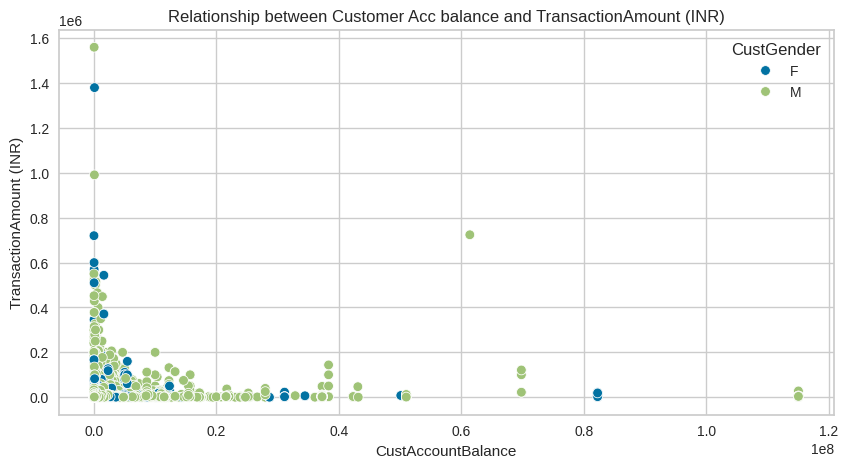

In [26]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a scatter plot with Seaborn
sns.scatterplot(x=df['CustAccountBalance'], y=df['TransactionAmount (INR)'], hue=df['CustGender'])

# Set title for the plot
plt.title('Relationship between Customer Acc balance and TransactionAmount (INR)')

# Display the plot
plt.show()


The graph reveals an intriguing pattern, many higher transaction amounts are actually executed by customers with relatively lower account balances and customers who have higher balance have done significantly low value transaction. This finding challenges the common belief that only wealthy individuals or high-net-worth business clients engage in high-value transactions.

The presence of significant transactions among customers with lower account balances and with higher account balance indicates potential outliers within the transaction amount and CustAccountBalance column. These outliers may result from various factors such as sporadic large purchases, irregular financial activities, or even data entry anomalies.

In [27]:
def remove_outliers(df, column):
    """Removes outliers using the IQR method for a given column."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for multiple columns
columns_to_filter = ['CustAccountBalance', 'TransactionAmount (INR)']
for col in columns_to_filter:
    df = remove_outliers(df, col)

# Display the filtered dataframe
print(df.head())


  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-01-10          F   JAMSHEDPUR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   
5            T6   C1536588  1972-10-08          F     ITANAGAR   
6            T7   C7126560  1992-01-26          F       MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-08-02           143207   
2            17874.44      2016-08-02           142712   
4             6714.43      2016-08-02           181156   
5            53609.20      2016-08-02           173940   
6              973.46      2016-08-02           173806   

   TransactionAmount (INR)  Year  Month  Day  
0                     25.0  2016      8    2  
2                    459.0  2016      8    2  
4                   1762.5  2016      8    2  
5                    676.0  2016      8    2  
6                  

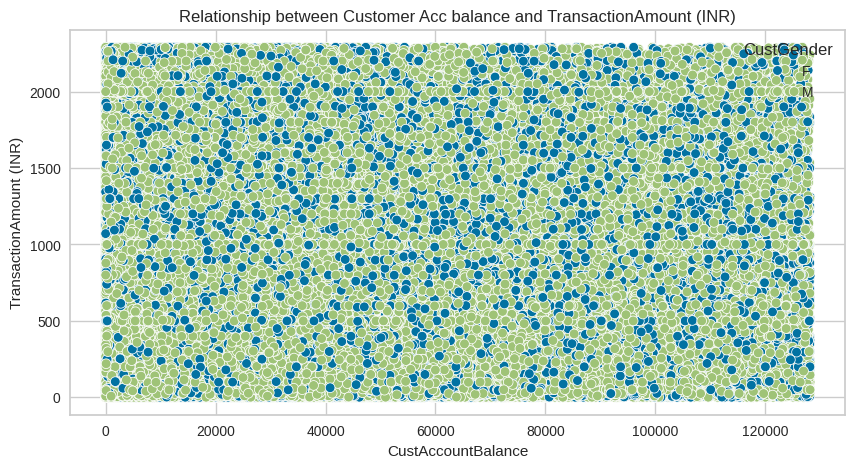

In [28]:
# Create a figure for the plot
plt.figure(figsize=(10, 5))

# Create a scatter plot with Seaborn using the filtered dataframe
sns.scatterplot(x=df['CustAccountBalance'], y=df['TransactionAmount (INR)'], hue=df['CustGender'])

# Set title for the plot
plt.title('Relationship between Customer Acc balance and TransactionAmount (INR)')

# Display the plot
plt.show()


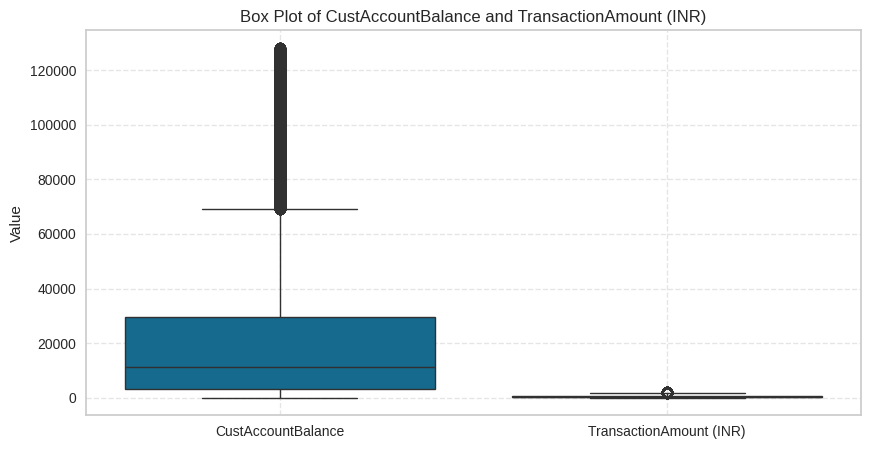

In [29]:
# List of columns to visualize
columns_to_plot = ['CustAccountBalance', 'TransactionAmount (INR)']

# Create box plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[columns_to_plot])
plt.title("Box Plot of CustAccountBalance and TransactionAmount (INR)")
plt.ylabel("Value")
plt.xticks(ticks=[0, 1], labels=columns_to_plot)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Applying log transformation to the both feature i.e. Account balance and transaction amount.

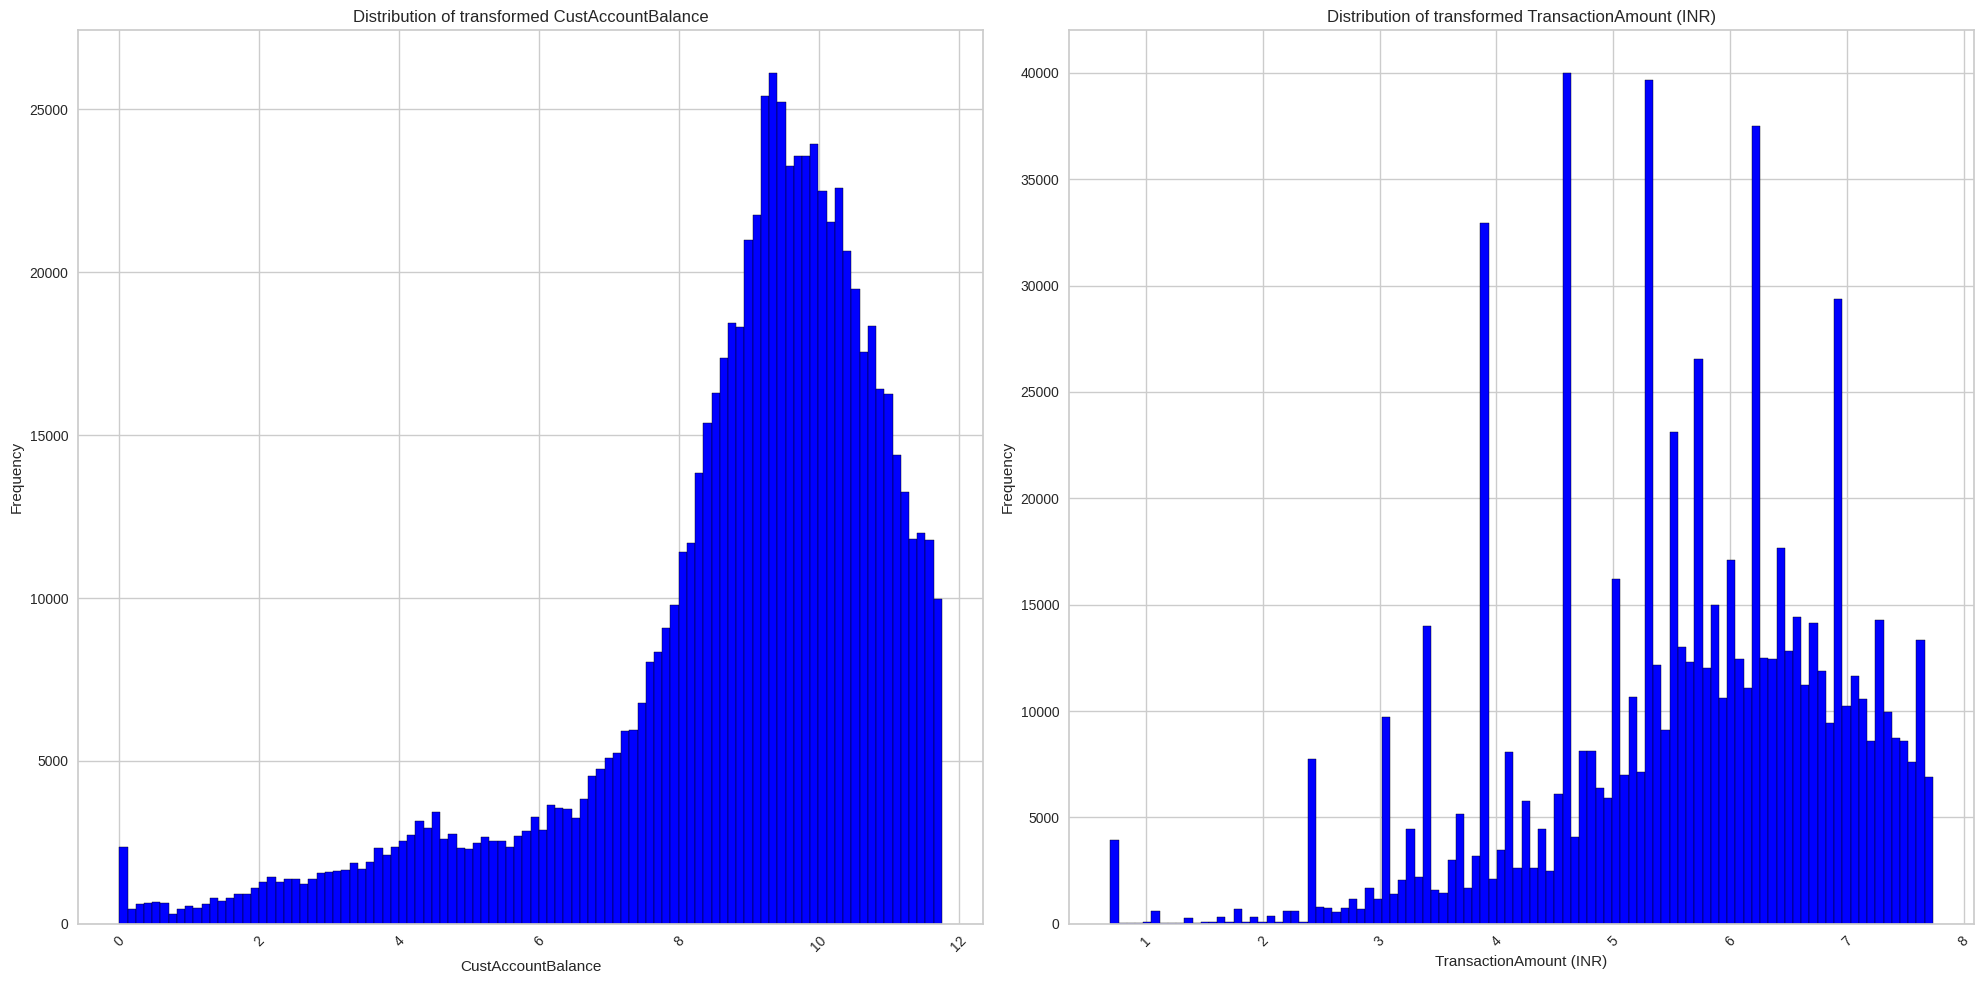

In [30]:
# Define columns to be transformed
columns = ['CustAccountBalance', 'TransactionAmount (INR)']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Iterate through each subplot and corresponding column
for ax, col in zip(axes.flatten(), columns):
    # Apply log transformation (log1p) to the column data
    transformed_col = np.log1p(df[col])

    # Plot histogram for the transformed data
    ax.hist(transformed_col, bins=100, color='blue', edgecolor='black')

    # Set title and labels for the subplot
    ax.set_title(f'Distribution of transformed {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()

# **Basic EDA**

### Problem statement 1: Check the distribution of transaction amount among male and female.

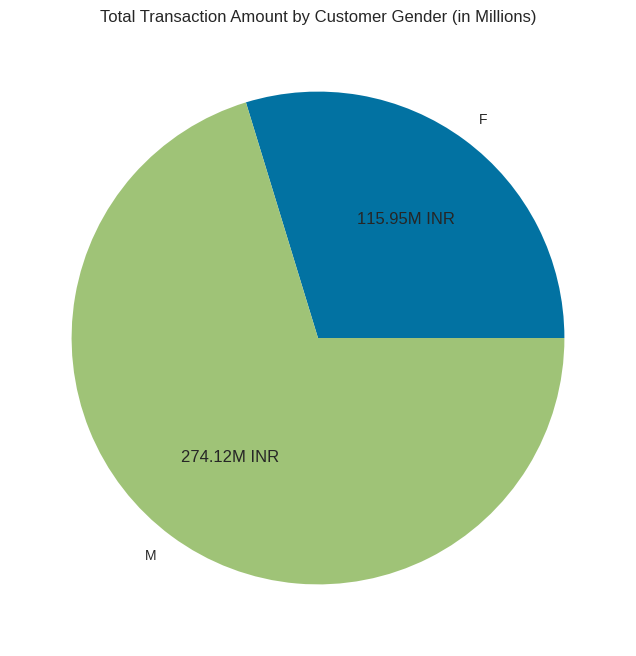

In [31]:
# Group by 'CustGender' and sum 'TransactionAmount (INR)'
gender_transaction_sum = df.groupby('CustGender')['TransactionAmount (INR)'].sum() / 1_000_000  # Convert to millions

# Plotting
plt.figure(figsize=(12, 8))

# Add amounts as text annotations on the pie chart
amounts = [f'{amt:.2f}M INR' for amt in gender_transaction_sum]
patches, texts, autotexts = plt.pie(gender_transaction_sum, autopct='%1.1f%%', startangle=0, labels=gender_transaction_sum.index)

# Annotate the pie chart with the sum of amounts in millions
plt.title('Total Transaction Amount by Customer Gender (in Millions)')
plt.ylabel('')  # Remove default ylabel


for i, text in enumerate(autotexts):
    text.set_text(amounts[i])

plt.show()


Here as we can see most of the transaction are done by male as compared to female.

### Problem statement 2: Find the which month has the highest transaction amount.

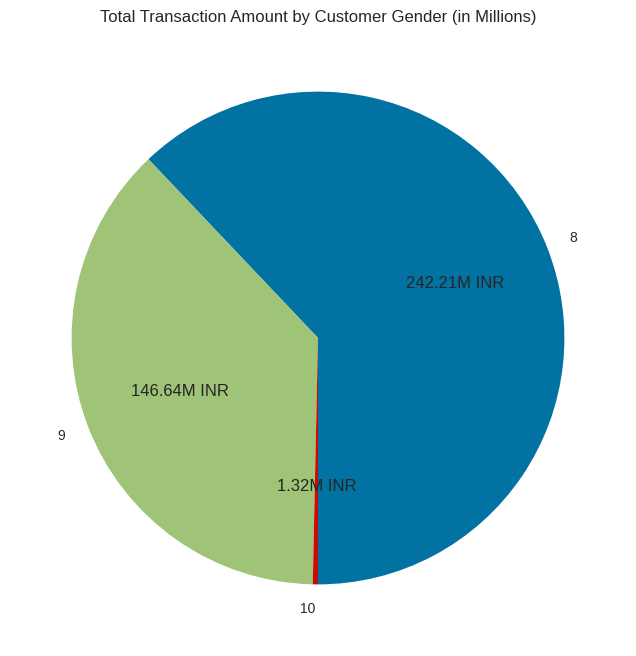

In [32]:
# Group by 'CustGender' and sum 'TransactionAmount (INR)'
gender_transaction_sum = df.groupby('Month')['TransactionAmount (INR)'].sum() / 1_000_000  # Convert to millions

# Plotting
plt.figure(figsize=(12, 8))

# Add amounts as text annotations on the pie chart
amounts = [f'{amt:.2f}M INR' for amt in gender_transaction_sum]
patches, texts, autotexts = plt.pie(gender_transaction_sum, autopct='%1.1f%%', startangle=270, labels=gender_transaction_sum.index)

# Annotate the pie chart with the sum of amounts in millions
plt.title('Total Transaction Amount by Customer Gender (in Millions)')
plt.ylabel('')  # Remove default ylabel


for i, text in enumerate(autotexts):
    text.set_text(amounts[i])

plt.show()

There is only 3 months data is given and from these 3 months transaction in august is greater then all the months and september is at no. 2.

### Problem statement 3: Find the distribution of transaction amount among days of the months.

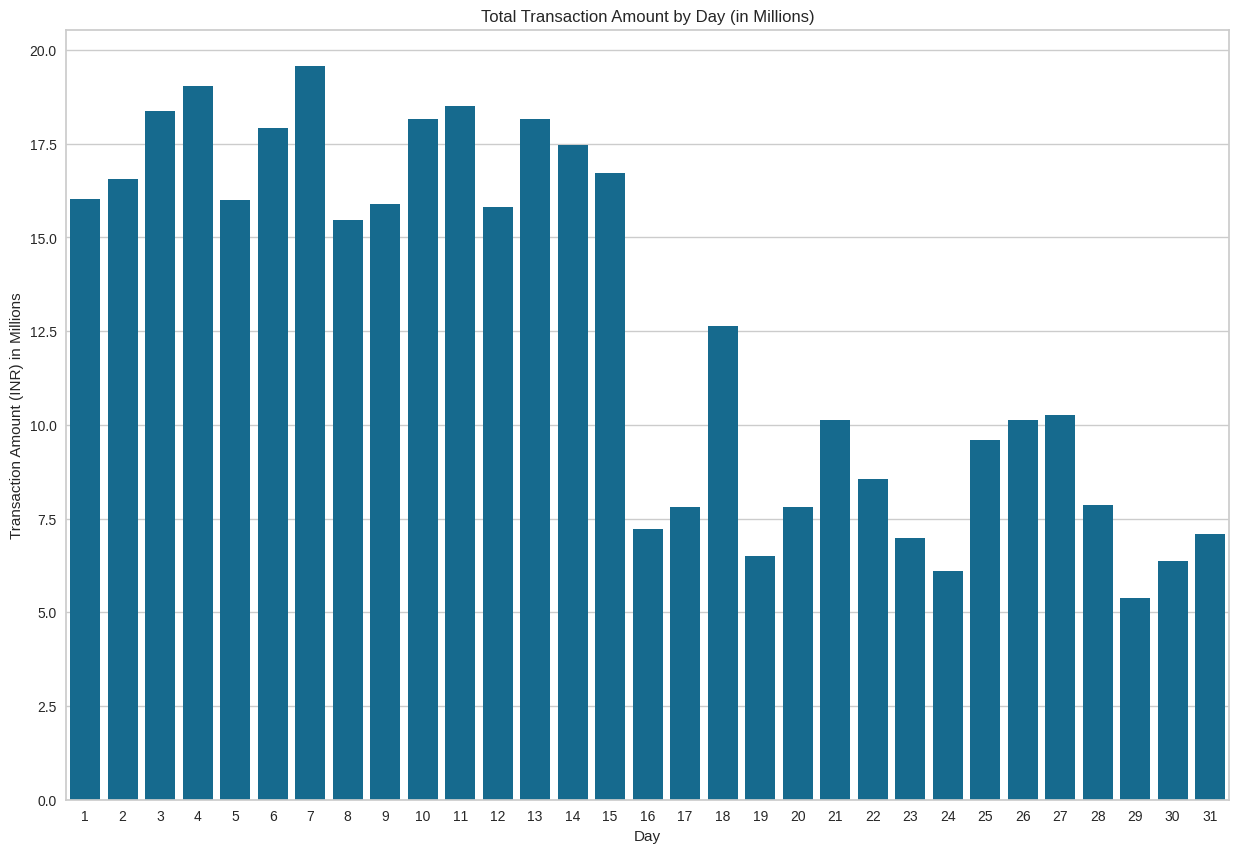

In [33]:
# Assuming df is your DataFrame

# Group by 'Day' and sum 'TransactionAmount (INR)'
day_transaction_sum = df.groupby('Day')['TransactionAmount (INR)'].sum() / 1_000_000  # Convert to millions

# Reset index to make 'Day' a column again for plotting
day_transaction_sum = day_transaction_sum.reset_index()

# Plotting
plt.figure(figsize=(15, 10))

# Create barplot
ax = sns.barplot(x='Day', y='TransactionAmount (INR)', data=day_transaction_sum)
# Set titles and labels
plt.title('Total Transaction Amount by Day (in Millions)')
plt.xlabel('Day')
plt.ylabel('Transaction Amount (INR) in Millions')

# Display plot
plt.show()

As we can see is the graph the transaction amount in 1st half is good as compared to the 2nd half of the months.

Let's find the correlation between CustAccountBalance,TransactionAmount (INR) and TransactionDate by plotting heatmap

<Axes: >

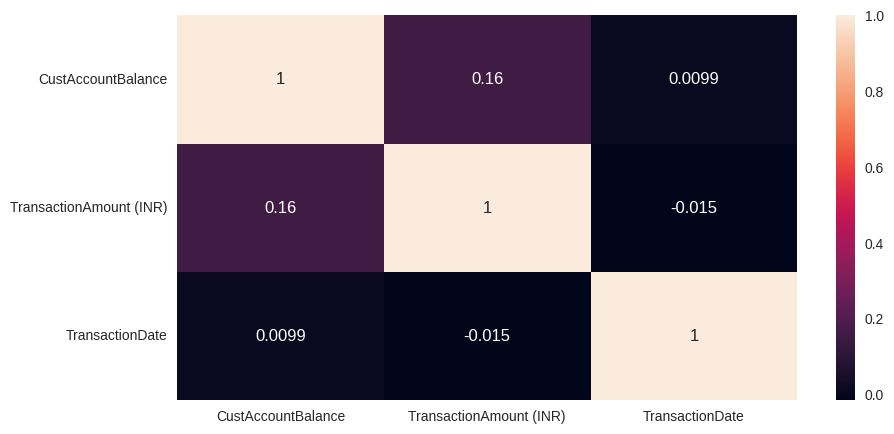

In [34]:
df1 = df[['CustAccountBalance','TransactionAmount (INR)', 'TransactionDate']]
plt.figure(figsize = (10,5))
sns.heatmap(df1.corr(), annot = True)

From the above graph, it is clearly visible that there is almost 0 correlation between Customer Account balance and Date and Transaction amount with Date, However, there is a little correletaion between Transaction Date and Customer Account Balance.

# **Creating Features (Recency, Frequency and Monetory)**

In [35]:
rfm_df = df.groupby(by='CustomerID', as_index=False).agg({'TransactionDate' : lambda x: (latest_date-x.max()).days, 'TransactionID' : lambda x : len(x), 'TransactionAmount (INR)' : lambda x : sum(x)})
rfm_df.rename(columns={'TransactionDate' : 'Recency', 'TransactionID' : 'Frequency', 'TransactionAmount (INR)' : 'Monetary'}, inplace=True)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,C1010011,73,1,356.0
1,C1010012,68,1,1499.0
2,C1010014,81,1,1205.0
3,C1010018,36,1,30.0
4,C1010031,78,2,1864.0


In [36]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,675486.0,55.701852,15.227136,0.0,44.0,55.00,69.0,81.00
Frequency,675486.0,1.134781,0.379306,1.0,1.0,1.00,1.0,6.00
Monetary,675486.0,577.612248,590.301786,1.0,140.0,358.65,846.0,5780.55


### Plotting Recency, frequency and monetory to see the distribution of these three features.

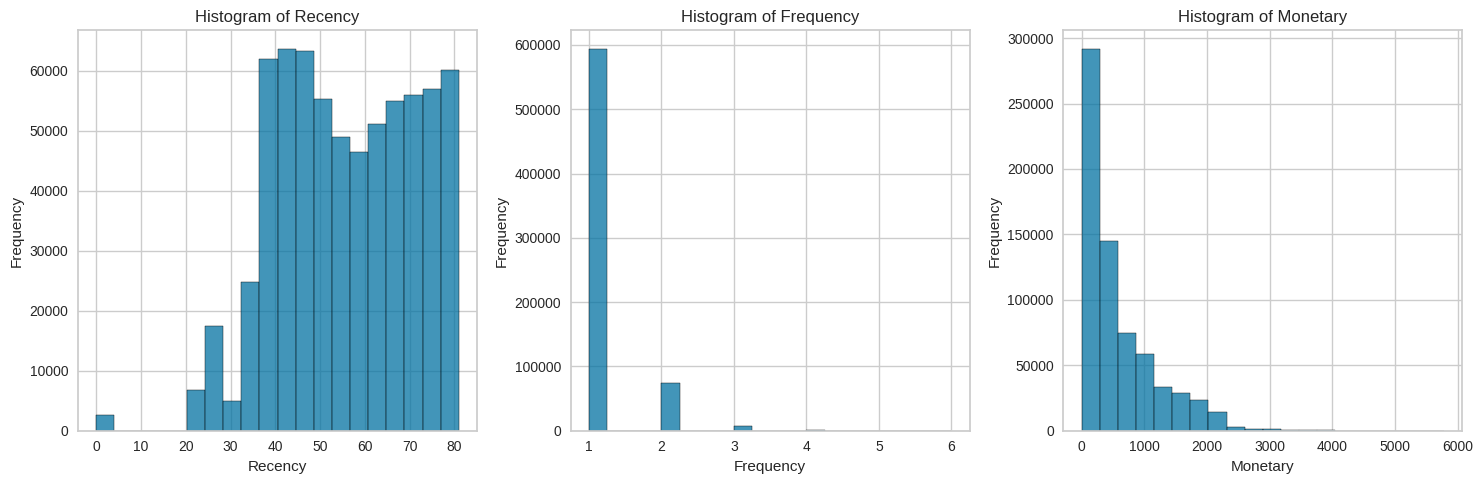

In [37]:
# Define columns to be plotted
columns = ['Recency', 'Frequency', 'Monetary']

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterate through each subplot and corresponding column
for ax, col in zip(axs.flatten(), columns):
    sns.histplot(x=rfm_df[col], ax=ax, bins=20)  # Plot histogram using Seaborn's histplot
    ax.set_title(f'Histogram of {col}')  # Set title for the subplot
    ax.set_xlabel(col)  # Set x-axis label
    ax.set_ylabel('Frequency')  # Set y-axis label

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()

<Axes: >

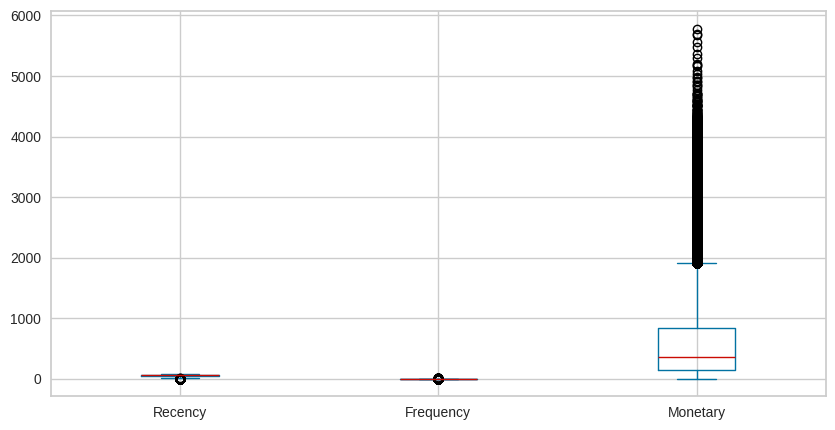

In [38]:
rfm_df.plot(kind = 'box', figsize = (10,5))

### Plotting Recency, frequency and monetory after transformation to the log to see the distribution of these three features.

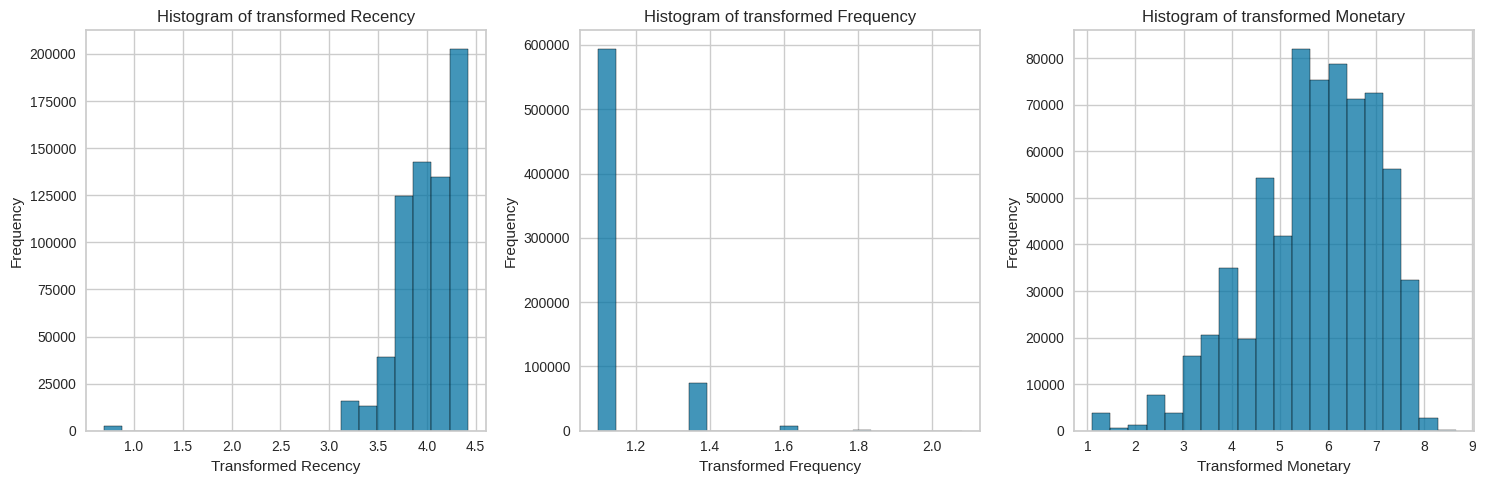

In [39]:
# Define columns to be transformed and plotted
columns = ['Recency', 'Frequency', 'Monetary']

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterate through each subplot and corresponding column
for ax, col in zip(axs.flatten(), columns):
    # Apply log transformation (log1p) to the column data
    transformed_col = np.log1p(rfm_df[col] + 1)

    # Plot histogram for the transformed data using Seaborn's histplot
    sns.histplot(x=transformed_col, ax=ax, bins=20)

    # Set title for the subplot
    ax.set_title(f'Histogram of transformed {col}')
    ax.set_xlabel(f'Transformed {col}')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()

Applying log transformation to these features to avoid skewness and adding 1 before transformation to avoid zero value.

In [40]:
# Apply log transformation to 'Recency', 'Frequency', and 'Monetary' columns
rfm_df['Recency_log'] = np.log1p(rfm_df['Recency'] + 1)
rfm_df['Frequency_log'] = np.log1p(rfm_df['Frequency'] + 1)
rfm_df['Monetary_log'] = np.log1p(rfm_df['Monetary'] + 1)

# Display the modified dataframe with logarithmically transformed columns
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
0,C1010011,73,1,356.0,4.317488,1.098612,5.880533
1,C1010012,68,1,1499.0,4.248495,1.098612,7.313887
2,C1010014,81,1,1205.0,4.418841,1.098612,7.095893
3,C1010018,36,1,30.0,3.637586,1.098612,3.465736
4,C1010031,78,2,1864.0,4.382027,1.386294,7.531552


In [41]:
rfm_df.set_index('CustomerID', inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
C1010011,73,1,356.0,4.317488,1.098612,5.880533
C1010012,68,1,1499.0,4.248495,1.098612,7.313887
C1010014,81,1,1205.0,4.418841,1.098612,7.095893
C1010018,36,1,30.0,3.637586,1.098612,3.465736
C1010031,78,2,1864.0,4.382027,1.386294,7.531552


Scaling the featurs to convert the scale of all the features into same range.

In [42]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

# scaling our data
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)
X

array([[ 0.89091033, -0.3621451 ,  0.11258721],
       [ 0.69104934, -0.3621451 ,  1.22161447],
       [ 1.18451182, -0.3621451 ,  1.05294652],
       ...,
       [ 0.5205981 , -0.3621451 , -0.68319505],
       [ 0.04463922, -0.3621451 , -1.38015961],
       [-1.96329402, -0.3621451 ,  0.78797896]])

### Applying the Elbow Method to Determine the Optimal Number of Clusters for Accurate Data Segmentation

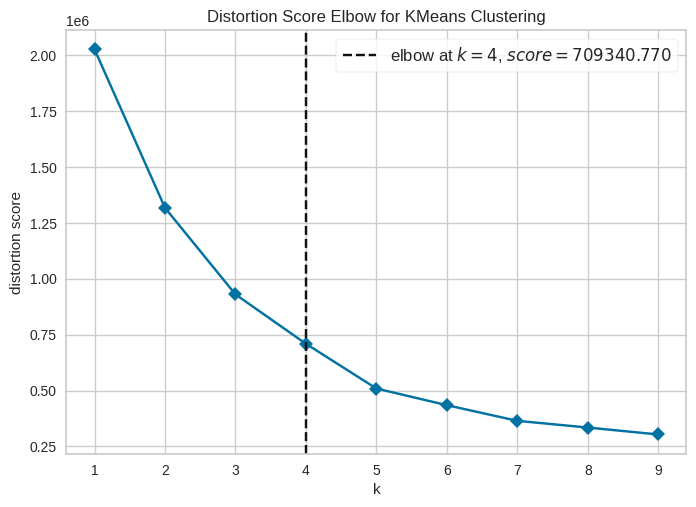

In [43]:
# Dictionary to store SSE values for different k
SSE = {}

# Iterate over a range of k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    SSE[k] = kmeans.inertia_

# Instantiate the KElbowVisualizer with KMeans model
visualizer = KElbowVisualizer(kmeans, k=(1, 10), metric='distortion', timings=False)

# Fit the visualizer to the data
visualizer.fit(X)

# Finalize and display the figure
visualizer.poof()

# Display the plot
plt.show()

As we can that the optimal number of clusters are 3. Let's devide our customers into 3 segments.

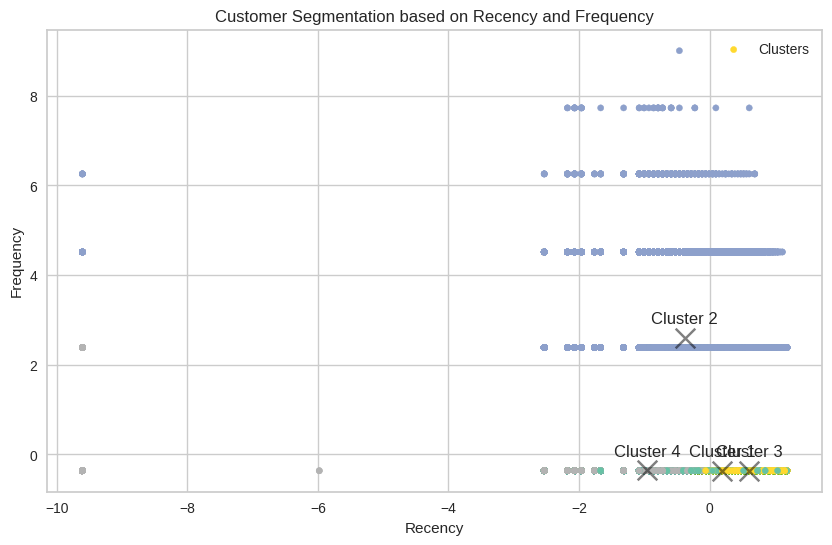

In [44]:
# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:, 0], X[:, 1], c=y_km, s=20, cmap='Set2', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i+1}', (center[0], center[1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

From this 2D diagram we can not clearly interpret and distinguish between clusters, To enhance the interpretation and distinction of the clusters, we will transition from the 2D diagram to a 3D scatter plot for a more comprehensive visualization.

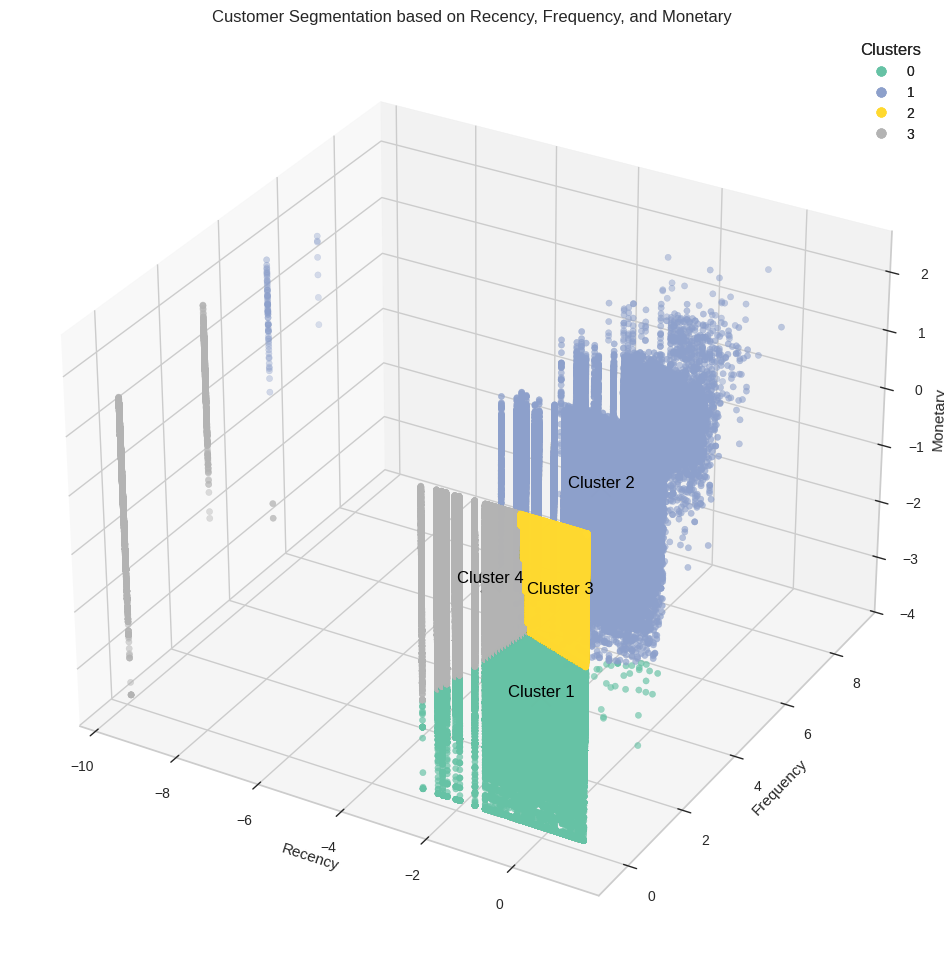

In [45]:
# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters in 3D
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Customer Segmentation based on Recency, Frequency, and Monetary')

# Scatter plot of the clusters
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_km, s=20, cmap='Set2')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    ax.text(center[0], center[1], center[2], f'Cluster {i+1}', color='black', fontsize=12, ha='center')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

Now, from this plot we can easily see the clusters and distinguish between clusters.

### Now Lets give score to custoemrs based on recency frequency and monetory.
### To do this we'll divide our data into 4 quartiles  and give scores according to that.

In [46]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [47]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [48]:
# calculate RFM segment values for each record
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,C1010011,73,1,356.0,4.317488,1.098612,5.880533,4,4,3
1,C1010012,68,1,1499.0,4.248495,1.098612,7.313887,3,4,1
2,C1010014,81,1,1205.0,4.418841,1.098612,7.095893,4,4,1
3,C1010018,36,1,30.0,3.637586,1.098612,3.465736,1,4,4
4,C1010031,78,2,1864.0,4.382027,1.386294,7.531552,4,1,1


In [49]:
# add RFM group column
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,C1010011,73,1,356.0,4.317488,1.098612,5.880533,4,4,3,443,11
1,C1010012,68,1,1499.0,4.248495,1.098612,7.313887,3,4,1,341,8
2,C1010014,81,1,1205.0,4.418841,1.098612,7.095893,4,4,1,441,9
3,C1010018,36,1,30.0,3.637586,1.098612,3.465736,1,4,4,144,9
4,C1010031,78,2,1864.0,4.382027,1.386294,7.531552,4,1,1,411,6


In [50]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,,,,
C1010011,73,1,356.0,4.317488,1.098612,5.880533,4,4,3,443,11,2
C1010012,68,1,1499.0,4.248495,1.098612,7.313887,3,4,1,341,8,2
C1010014,81,1,1205.0,4.418841,1.098612,7.095893,4,4,1,441,9,2
C1010018,36,1,30.0,3.637586,1.098612,3.465736,1,4,4,144,9,0
C1010031,78,2,1864.0,4.382027,1.386294,7.531552,4,1,1,411,6,1


In [51]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby('Cluster')[['RFMScore', 'Recency', 'Frequency', 'Monetary']].mean()
cluster_averages

,RFMScore,Recency,Frequency,Monetary
Cluster,,,,
0,10.580021,58.487561,1.000220,67.035292
1,4.605281,48.038638,2.104341,1071.711123
2,9.271364,66.601464,1.000000,719.121052
3,7.538951,39.442880,1.003286,612.861885


## **Cluster 0: Low-Value, At-Risk Customers**
**Recency:** 58 days (moderate)

**Frequency:** ~1 transaction (very low)

**Monetary:** ₹67 (extremely low spending)

#### **Interpretation:**
Customers in this cluster are sporadic users who make very few transactions and spend the least amount. They are at risk of becoming inactive or completely disengaged from the banking services.

#### **Strategy:**
**📌 Reactivation Campaigns:** Provide special promotions, cashback, or rewards for transactions.

**📌 Personalized Outreach:** Offer reminders, alerts, or targeted financial products to keep them engaged.

**📌 Understanding Barriers:** Conduct surveys to analyze why these customers have low engagement.

## **Cluster 1: High-Engagement Customers**
**Recency:** 48 days (moderate)
**Frequency:** ~2 transactions (moderate)
**Monetary:** ₹1071 (high spending)
#### **Interpretation:**
This cluster consists of frequent users with high spending power, making them a valuable customer segment. These customers are actively using banking services and show strong potential for loyalty.

#### **Strategy:**
**📌 Exclusive Loyalty Programs:** Offer reward-based transactions, higher interest rates on savings, or exclusive investment opportunities.

**📌 Personalized Banking Services:** Provide dedicated relationship managers or financial advisors.

**📌 Cross-Selling Opportunities:** Introduce them to premium credit cards, loans, or wealth management services.

## **Cluster 2: Wealthy But Infrequent Users**
**Recency:** 66 days (moderate-high)
**Frequency:** ~1 transaction (very low)
**Monetary:** ₹719 (high spending)
#### **Interpretation:**
This segment consists of high-value customers who transact very infrequently. They may be using the bank for specific services but are not fully engaged.

#### **Strategy:**
**📌 Encourage More Frequent Transactions:** Offer benefits for repeated usage, such as transaction-based rewards.

**📌 Highlight Additional Services:** Introduce them to investment options, savings plans, or financial advisory.

**📌 Reduce Inactivity Risk:** Personalized follow-ups and special incentives for continued banking engagement.

## **Cluster 3: Young & Growing Customers**
**Recency:** 39 days (low, very recent transactions)
**Frequency:** ~1 transaction (low-moderate)
**Monetary:** ₹612 (moderate spending)
#### **Interpretation:**
This segment consists of recently active customers who are moderate spenders but have not yet reached high levels of engagement. They may include new customers or young professionals testing banking services.

#### **Strategy:
**📌 Onboarding Support:** Provide educational resources, app tutorials, and welcome offers.

**📌 Incentives for More Usage:** Cashback on first deposits, discounts on digital transactions, or promotional interest rates.

**📌 Personalized Customer Journey:** Offer targeted recommendations based on their banking behavior.

##**📌 Conclusion**
Applying K-Means clustering to Recency, Frequency, and Monetary (RFM) data has provided valuable insights into customer segmentation. The segmentation reveals four distinct customer types:

**1️⃣ At-Risk Customers** – Require re-engagement to prevent churn.

**2️⃣ High-Engagement Customers** – Need loyalty programs to maximize lifetime value.

**3️⃣ Wealthy But Infrequent Users** – Need incentives for higher transaction frequency.

**4️⃣ Growing Customers** – Require nurturing to develop long-term engagement.


Strategically implementing personalized banking offers, proactive customer service, and targeted marketing campaigns will help maximize customer retention, satisfaction, and long-term profitability in the banking sector.